# Sesión 7: Métricas de Evaluación en Machine Learning

## 🎯 Objetivos de la Sesión
- Comprender las diferentes métricas de evaluación para clasificación
- Aprender cuándo usar cada métrica según el contexto del problema
- Interpretar matriz de confusión, ROC curves y precision-recall curves
- Implementar métricas de evaluación en Python

---

## 📚 TEORÍA

### 1. ¿Por qué necesitamos diferentes métricas? (10 min)

La **exactitud (accuracy)** no siempre es la mejor métrica:

**Ejemplo práctico**: Detección de cáncer
- Dataset: 1000 pacientes, 50 con cáncer (5%), 950 sin cáncer (95%)
- Un modelo que siempre predice "sin cáncer" tendrá 95% de exactitud
- ¡Pero fallará en detectar TODOS los casos de cáncer!

### 2. Métricas Fundamentales para Clasificación (15 min)

#### A. Matriz de Confusión
La base de todas las métricas de clasificación:

```
                    VALORES REALES
                 Positivo    Negativo
PREDICCIONES
Positivo      |    TP    |    FP    |
Negativo      |    FN    |    TN    |
```

**Donde:**
- **TP (True Positives)**: Casos positivos predichos correctamente
- **TN (True Negatives)**: Casos negativos predichos correctamente  
- **FP (False Positives)**: Casos negativos predichos como positivos (Error Tipo I)
- **FN (False Negatives)**: Casos positivos predichos como negativos (Error Tipo II)

#### B. Métricas Derivadas

**1. Accuracy (Exactitud)**
```
Accuracy = (TP + TN) / (TP + TN + FP + FN)
```
- **Cuándo usarla**: Clases balanceadas
- **Limitación**: Engañosa con clases desbalanceadas

**2. Precision (Precisión)**
```
Precision = TP / (TP + FP)
```
- **Pregunta**: "De todos los que predije como positivos, ¿cuántos realmente lo son?"
- **Cuándo usarla**: Cuando los falsos positivos son costosos
- **Ejemplo**: Filtro de spam (no queremos clasificar emails importantes como spam)

**3. Recall (Sensibilidad/Sensitivity)**
```
Recall = TP / (TP + FN)
```
- **Pregunta**: "De todos los casos positivos reales, ¿cuántos detecté?"
- **Cuándo usarla**: Cuando los falsos negativos son costosos
- **Ejemplo**: Detección de cáncer (no queremos dejar casos sin detectar)

**4. F1-Score**
```
F1 = 2 × (Precision × Recall) / (Precision + Recall)
```
- **Qué es**: Media armónica entre precision y recall
- **Cuándo usarla**: Cuando necesitas balance entre precision y recall

#### C. Specificity (Especificidad)
```
Specificity = TN / (TN + FP)
```
- **Pregunta**: "De todos los casos negativos reales, ¿cuántos identifiqué correctamente?"

### 3. ROC Curve y AUC (10 min)

#### ROC Curve (Receiver Operating Characteristic)
- **Eje Y**: True Positive Rate (Recall/Sensitivity)
- **Eje X**: False Positive Rate (1 - Specificity)
- **Propósito**: Visualizar el trade-off entre sensitivity y specificity

#### AUC (Area Under the Curve)
- **Rango**: 0 a 1
- **Interpretación**:
  - AUC = 0.5: Modelo aleatorio
  - AUC = 0.7-0.8: Modelo decente
  - AUC = 0.8-0.9: Modelo bueno
  - AUC > 0.9: Modelo excelente
- **Ventaja**: Métrica única que resume el rendimiento en todos los umbrales

### 4. Precision-Recall Curve (5 min)

**Cuándo usar P-R Curve vs ROC Curve:**
- **ROC Curve**: Clases balanceadas
- **P-R Curve**: Clases desbalanceadas (la clase positiva es rara)

**¿Por qué?** En datasets desbalanceados, ROC puede ser optimista porque TN domina la especificidad.

---

# PRÁCTICA 

__Dataset: Breast Cancer Wisconsin__

Usaremos el famoso dataset de cáncer de mama para practicar todas las métricas.

**Paso 1: Preparación del Entorno y Datos**

In [6]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    roc_curve, auc, precision_recall_curve,
    accuracy_score, precision_score, recall_score, f1_score
)
import warnings
warnings.filterwarnings('ignore')

# Configurar matplotlib para gráficos más bonitos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [7]:
# Cargar y explorar el dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

print("=== INFORMACIÓN DEL DATASET ===")
print(f"Número de muestras: {X.shape[0]}")
print(f"Número de características: {X.shape[1]}")
print(f"Clases: {cancer.target_names}")
print(f"Distribución de clases:")
print(f"  - Malignos (0): {np.sum(y == 0)} ({np.sum(y == 0)/len(y)*100:.1f}%)")
print(f"  - Benignos (1): {np.sum(y == 1)} ({np.sum(y == 1)/len(y)*100:.1f}%)")

=== INFORMACIÓN DEL DATASET ===
Número de muestras: 569
Número de características: 30
Clases: ['malignant' 'benign']
Distribución de clases:
  - Malignos (0): 212 (37.3%)
  - Benignos (1): 357 (62.7%)


**Paso 2: Preparación de Datos y Entrenamiento**

In [8]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Estandarizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar dos modelos para comparar
print("Entrenando modelos...")

# Modelo 1: KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Modelo 2: SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

print("✅ Modelos entrenados exitosamente")

Entrenando modelos...
✅ Modelos entrenados exitosamente


**Paso 3: Cálculo Manual de Métricas**

In [9]:
def calcular_metricas_manual(y_true, y_pred, nombre_modelo):
    """
    Función para calcular métricas manualmente desde la matriz de confusión
    """
    # Calcular matriz de confusión manual
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    print(f"\n=== MÉTRICAS PARA {nombre_modelo} ===")
    print("Matriz de Confusión:")
    print(f"  TP: {TP}  |  FP: {FP}")
    print(f"  FN: {FN}  |  TN: {TN}")
    
    # Calcular métricas
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\nMétricas calculadas manualmente:")
    print(f"  Accuracy:    {accuracy:.4f}")
    print(f"  Precision:   {precision:.4f}")
    print(f"  Recall:      {recall:.4f}")
    print(f"  Specificity: {specificity:.4f}")
    print(f"  F1-Score:    {f1:.4f}")
    
    return {
        'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN,
        'accuracy': accuracy, 'precision': precision, 
        'recall': recall, 'specificity': specificity, 'f1': f1
    }

# Calcular métricas para ambos modelos
metricas_knn = calcular_metricas_manual(y_test, y_pred_knn, "KNN")
metricas_svm = calcular_metricas_manual(y_test, y_pred_svm, "SVM")


=== MÉTRICAS PARA KNN ===
Matriz de Confusión:
  TP: 107  |  FP: 7
  FN: 0  |  TN: 57

Métricas calculadas manualmente:
  Accuracy:    0.9591
  Precision:   0.9386
  Recall:      1.0000
  Specificity: 0.8906
  F1-Score:    0.9683

=== MÉTRICAS PARA SVM ===
Matriz de Confusión:
  TP: 105  |  FP: 2
  FN: 2  |  TN: 62

Métricas calculadas manualmente:
  Accuracy:    0.9766
  Precision:   0.9813
  Recall:      0.9813
  Specificity: 0.9688
  F1-Score:    0.9813


**Paso 4: Visualización de Matriz de Confusión**

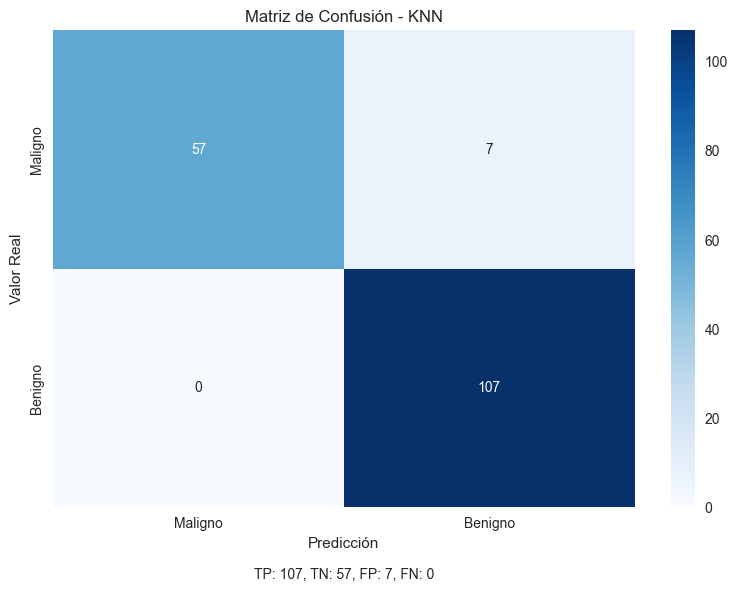

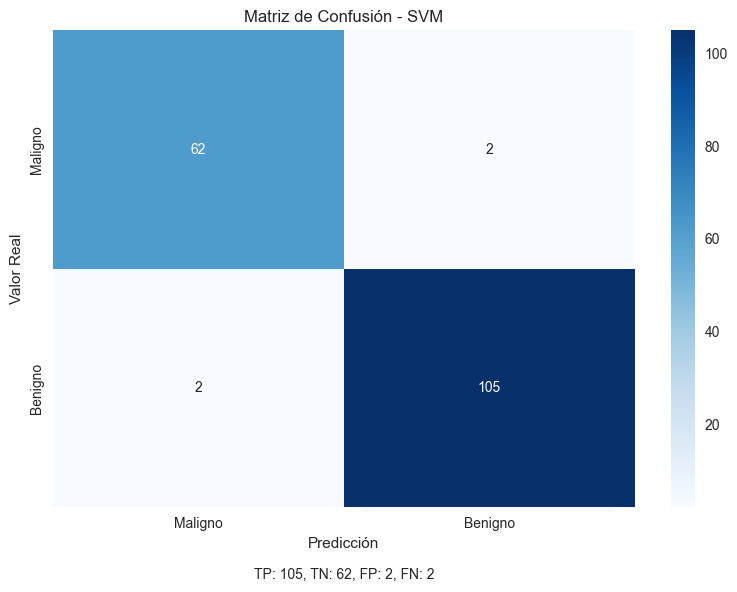

In [10]:
def plot_confusion_matrix(y_true, y_pred, modelo_nombre):
    """
    Crear visualización bonita de la matriz de confusión
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Maligno', 'Benigno'],
                yticklabels=['Maligno', 'Benigno'])
    plt.title(f'Matriz de Confusión - {modelo_nombre}')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    
    # Añadir interpretación
    TP, FP, FN, TN = cm[1,1], cm[0,1], cm[1,0], cm[0,0]
    plt.text(0.5, -0.15, 
             f'TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}', 
             transform=plt.gca().transAxes, ha='center')
    
    plt.tight_layout()
    plt.show()

# Visualizar matrices de confusión
plot_confusion_matrix(y_test, y_pred_knn, "KNN")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

**Paso 5: ROC Curves y Análisis de Trade-offs**

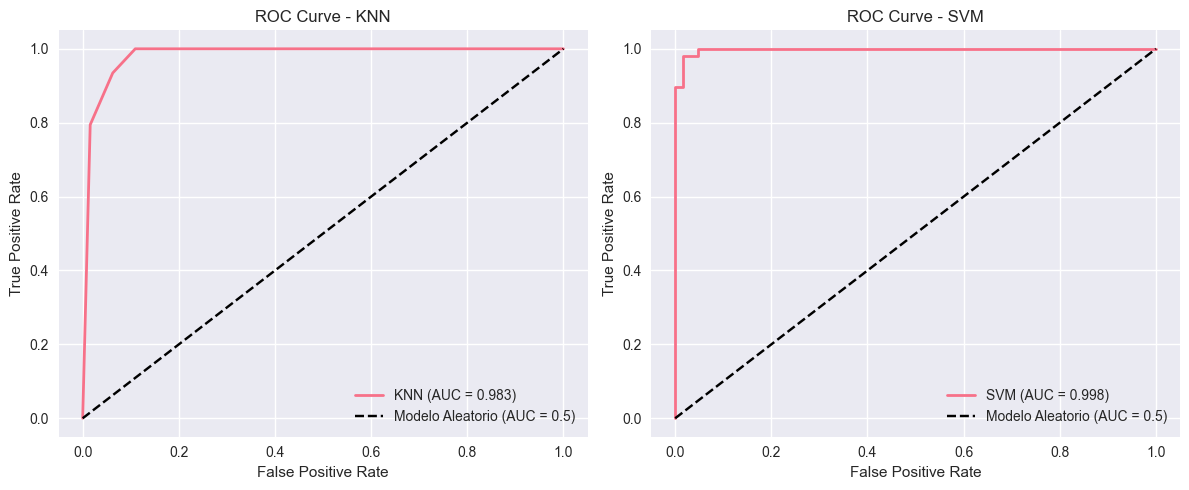

AUC Scores:
  KNN: 0.9827
  SVM: 0.9978


In [11]:
def plot_roc_curves():
    """
    Plotear curvas ROC para ambos modelos
    """
    plt.figure(figsize=(12, 5))
    
    # ROC para KNN
    plt.subplot(1, 2, 1)
    fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
    auc_knn = auc(fpr_knn, tpr_knn)
    
    plt.plot(fpr_knn, tpr_knn, linewidth=2, label=f'KNN (AUC = {auc_knn:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Modelo Aleatorio (AUC = 0.5)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - KNN')
    plt.legend()
    plt.grid(True)
    
    # ROC para SVM
    plt.subplot(1, 2, 2)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
    auc_svm = auc(fpr_svm, tpr_svm)
    
    plt.plot(fpr_svm, tpr_svm, linewidth=2, label=f'SVM (AUC = {auc_svm:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Modelo Aleatorio (AUC = 0.5)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - SVM')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"AUC Scores:")
    print(f"  KNN: {auc_knn:.4f}")
    print(f"  SVM: {auc_svm:.4f}")

# Crear gráficos ROC
plot_roc_curves()

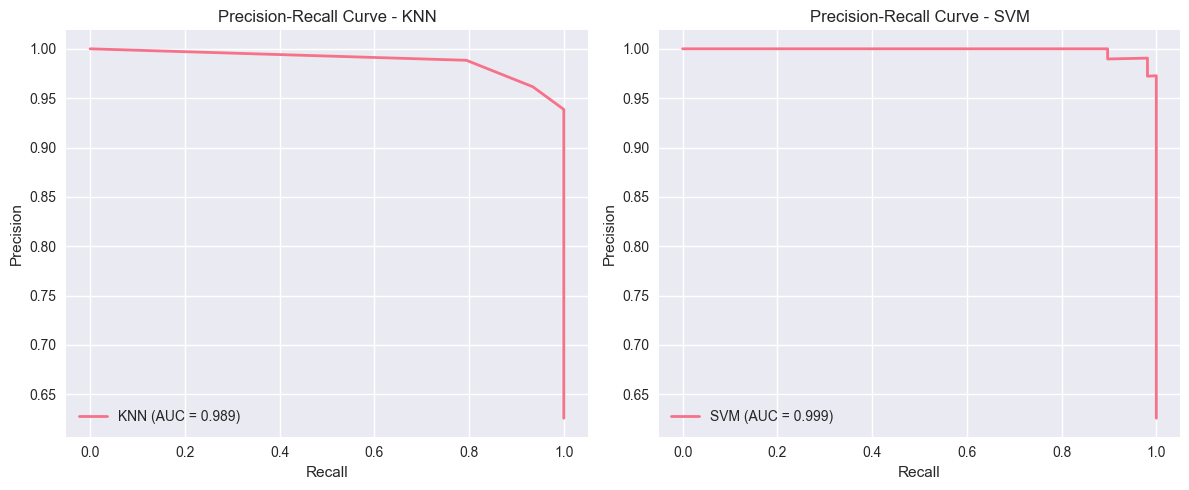

In [12]:
def plot_precision_recall_curves():
    """
    Plotear curvas Precision-Recall para comparar con ROC
    """
    plt.figure(figsize=(12, 5))
    
    # P-R para KNN
    plt.subplot(1, 2, 1)
    precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_proba_knn)
    pr_auc_knn = auc(recall_knn, precision_knn)
    
    plt.plot(recall_knn, precision_knn, linewidth=2, 
             label=f'KNN (AUC = {pr_auc_knn:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - KNN')
    plt.legend()
    plt.grid(True)
    
    # P-R para SVM
    plt.subplot(1, 2, 2)
    precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_proba_svm)
    pr_auc_svm = auc(recall_svm, precision_svm)
    
    plt.plot(recall_svm, precision_svm, linewidth=2, 
             label=f'SVM (AUC = {pr_auc_svm:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - SVM')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Crear gráficos Precision-Recall
plot_precision_recall_curves()

💡 **Tip profesional:** En la industria, siempre define las métricas de éxito ANTES de construir el modelo, basándote en el impacto del negocio, no solo en la performance técnica.

## Para la Próxima Sesión:

Aprenderemos sobre Validación Cruzada y Grid Search para optimizar nuestros modelos de manera robusta.